In [3]:
import pandas as pd 
import numpy as np
data = pd.read_csv('skroutz_tvs.csv')
data.head()

,20455,tv lg 43 43uk6470 led ultrahd smart tv wifi hdr dvb s2 1600pmi,2870,2330,LG 43UK6470PLC,810,Televisions
0,20456,lg 43uk6470 tv 43 led 4k ultra hd 1600pmi,4744,2330,LG 43UK6470PLC,810,Televisions
1,20457,lg 43uk6470 tv 43 led 4k ultra hd 1600pmi,4599,2330,LG 43UK6470PLC,810,Televisions
2,20458,tv lg 43 43uk6470 led ultrahd smart tv wifi hd...,2986,2330,LG 43UK6470PLC,810,Televisions
3,20459,lg tileorasi 43uk6470plc smart uhd 4k,3252,2330,LG 43UK6470PLC,810,Televisions
4,20460,lg 43uk6470plc 4k ultra hd smart,1388,2330,LG 43UK6470PLC,810,Televisions


In [4]:
data = data.drop(['20455', 'Televisions', '810'],1 )
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)
data.head()

,tv lg 43 43uk6470 led ultrahd smart tv wifi hdr dvb s2 1600pmi,2870,2330,LG 43UK6470PLC
0,981,189,0,208
1,981,184,0,208
2,5226,139,0,208
3,1774,152,0,208
4,987,63,0,208


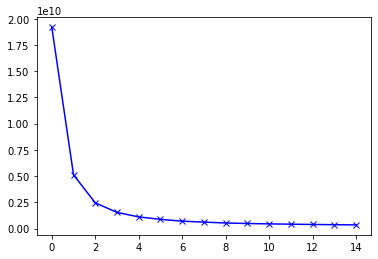

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 16):
    kmeans = KMeans(i, n_init=15)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(wcss, 'bx-')
plt.show()

In [6]:
kmeans = KMeans(3)
Y_kmeans = kmeans.fit_predict(data)


from sklearn.decomposition import PCA
pca = PCA(2)
x = pca.fit_transform(data)

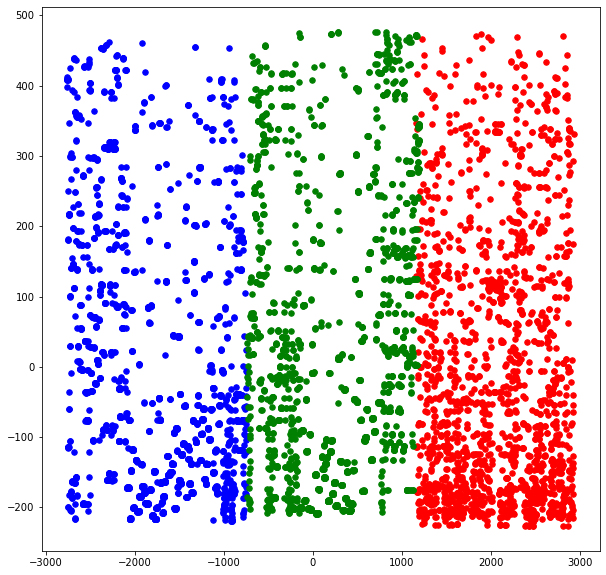

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(x[Y_kmeans==0, 0], x[Y_kmeans==0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(x[Y_kmeans==1, 0], x[Y_kmeans==1, 1], s=30, c='blue', label='Cluster 2')
plt.scatter(x[Y_kmeans==2, 0], x[Y_kmeans==2, 1], s=30, c='green', label='Cluster 3')
plt.show()
